# Correaltion
Here we check out how the different features interact together.

In [47]:
import DownloadAndExtractAndLoadDatasets as DEL # my own Module
from platform import python_version
import pandas as pd
import numpy as np
import hashlib
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.plotting import scatter_matrix




print(python_version())

import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__,
list(imports())

%matplotlib inline # only in a Jupyter notebook

3.7.4


UsageError: unrecognized arguments: # only in a Jupyter notebook


In [48]:

DEL.fetch_housing_data()

In [49]:
WorkingData = DEL.load_housing_data()

In [50]:
WorkingData["income_cat"] = np.ceil(WorkingData["median_income"] / 1.5)
WorkingData["income_cat"].where(WorkingData["income_cat"] < 5, 5.0, inplace=True)

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(WorkingData, WorkingData["income_cat"]):
    strat_train_set = WorkingData.loc[train_index]
    strat_test_set = WorkingData.loc[test_index]

In [52]:
# from sklearn.model_selection import StratifiedShuffleSplit
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [53]:
housing = strat_train_set.copy()

In [54]:
# Correaltion

In [55]:
corr_matrix = housing.corr()

In [56]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD84092E88>,
      dtype=object)

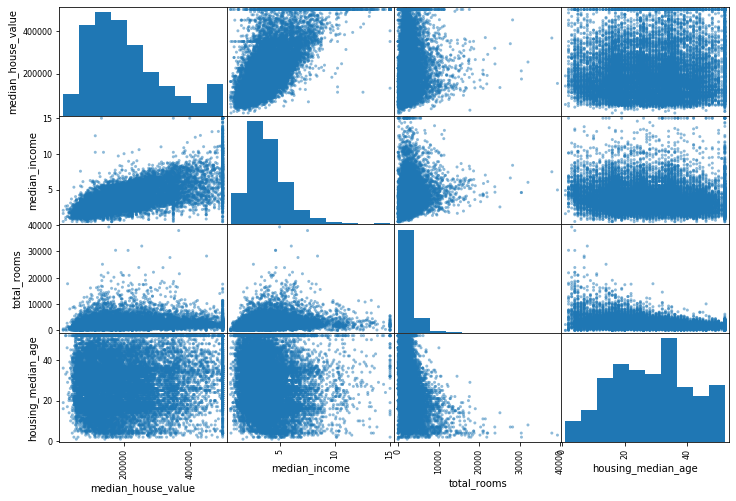

In [57]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

the diagnoal lines makes no sense because here we would plot each feature against itself => so we have a histoggramm of that Feature

In [58]:
# Extend the Analysis of the Correlation by creating our own Attributes
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [59]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD87CB8D08>,
      dtype=object)

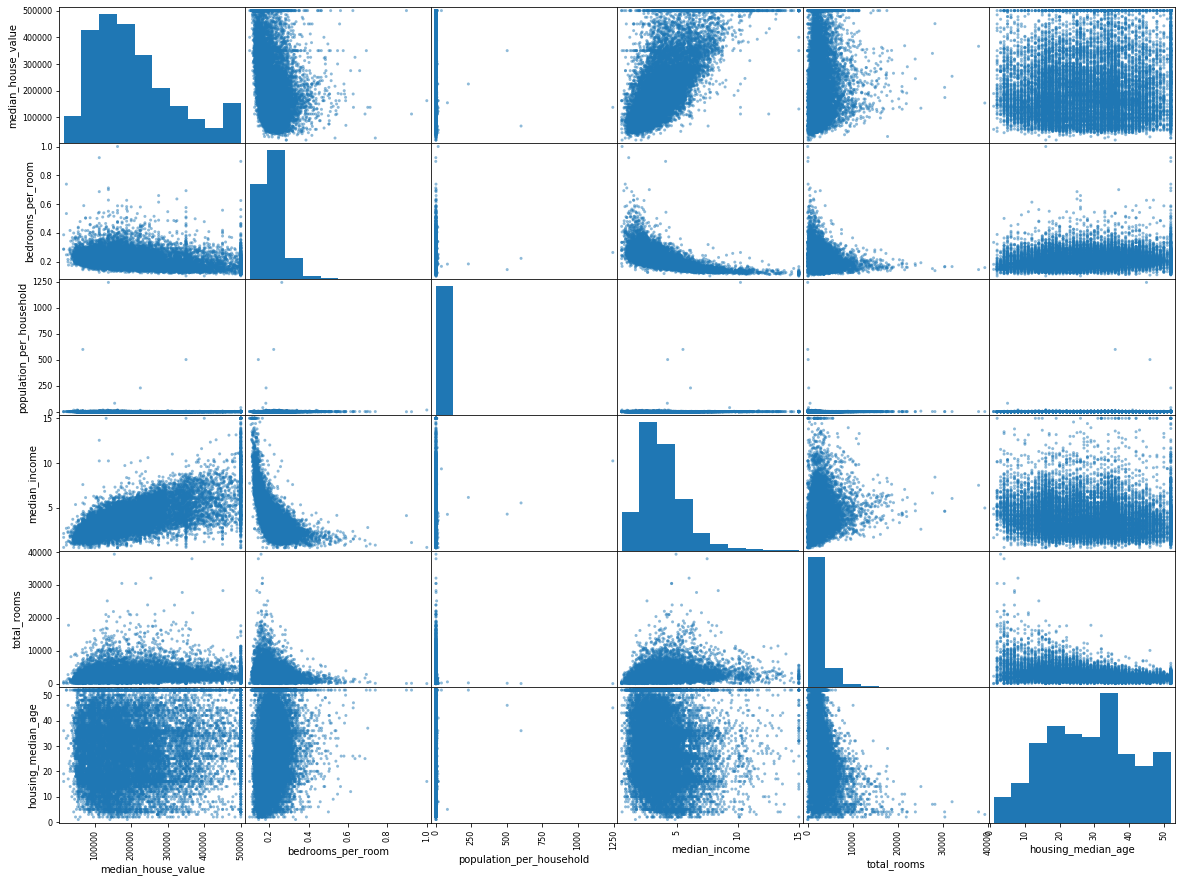

In [61]:
attributes = ["median_house_value", "bedrooms_per_room", "population_per_household", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20, 15))